<a href="https://colab.research.google.com/github/radhikasharma-0203/Reinforcement-Learning-21csu462/blob/main/Experiment_3_Upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ucb_bandit_solver(true_means, num_steps):
    num_bandits = len(true_means)
    sample_counts = np.zeros(num_bandits)
    sample_sums = np.zeros(num_bandits)
    rewards = np.zeros(num_steps)
    total_reward = 0
    average_reward = np.zeros(num_bandits)

    for step in range(num_steps):
        arm_to_pull = np.argmax(average_reward + np.sqrt(2 * np.log(step + 1) / (sample_counts + 1e-10)))
        reward = np.random.normal(true_means[arm_to_pull], 1)
        total_reward += reward
        sample_counts[arm_to_pull] += 1
        sample_sums[arm_to_pull] += reward
        average_reward[arm_to_pull] = sample_sums[arm_to_pull] / (sample_counts[arm_to_pull] + 1e-10)
        rewards[step] = total_reward / (step + 1)

    return rewards, total_reward

def random_sampling_solver(true_means, num_steps):
    num_bandits = len(true_means)
    rewards = np.zeros(num_steps)
    total_reward = 0

    for step in range(num_steps):
        arm_to_pull = np.random.randint(num_bandits)
        reward = np.random.normal(true_means[arm_to_pull], 1)
        total_reward += reward
        rewards[step] = total_reward / (step + 1)

    return rewards, total_reward


UCB Total Reward: 1499.6096963970883
Random Sampling Total Reward: 470.9708371381798


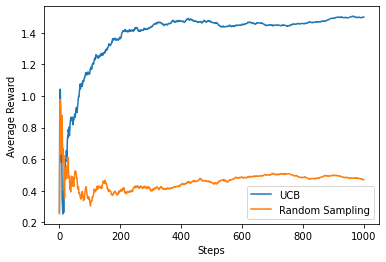

In [ ]:
def main():
    np.random.seed(42)

    num_bandits = 5
    num_steps = 1000

    true_means = np.random.normal(0, 1, num_bandits)

    ucb_rewards, ucb_total_reward = ucb_bandit_solver(true_means, num_steps)
    random_rewards, random_total_reward = random_sampling_solver(true_means, num_steps)

    print("UCB Total Reward:", ucb_total_reward)
    print("Random Sampling Total Reward:", random_total_reward)

    plt.plot(ucb_rewards, label='UCB')
    plt.plot(random_rewards, label='Random Sampling')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()